In [1]:
import scvelo as scv
from typing import Optional, Union,Tuple, List
from numpy import ndarray
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.10.2) on 2023-05-31 16:31.


In [2]:
import warnings
from scipy.sparse import issparse, spmatrix, csr_matrix

In [3]:
adata = scv.datasets.pancreas()
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [4]:
s = adata.to_df(layer='spliced')
s

index             Xkr4  Gm37381  Rp1  Rp1-1  Sox17  Gm37323  Mrpl15  Rgs20  \
index                                                                        
AAACCTGAGAGGGATA   0.0      0.0  0.0    0.0    0.0      0.0     0.0    0.0   
AAACCTGAGCCTTGAT   0.0      0.0  0.0    0.0    0.0      0.0     0.0    0.0   
AAACCTGAGGCAATTA   0.0      0.0  0.0    0.0    0.0      0.0     0.0    0.0   
AAACCTGCATCATCCC   0.0      0.0  0.0    0.0    0.0      0.0     0.0    0.0   
AAACCTGGTAAGTGGC   0.0      0.0  0.0    0.0    0.0      0.0     0.0    0.0   
...                ...      ...  ...    ...    ...      ...     ...    ...   
TTTGTCAAGTGACATA   0.0      0.0  0.0    0.0    0.0      0.0     0.0    0.0   
TTTGTCAAGTGTGGCA   0.0      0.0  0.0    0.0    0.0      0.0     0.0    0.0   
TTTGTCAGTTGTTTGG   0.0      0.0  0.0    0.0    0.0      0.0     0.0    0.0   
TTTGTCATCGAATGCT   0.0      0.0  0.0    0.0    0.0      0.0     0.0    0.0   
TTTGTCATCTGTTTGT   0.0      0.0  0.0    0.0    0.0      0.0     0.0    0.0   

index             Npbwr1  4732440D04Rik  ...  Gm28406  Gm29436  Gm28407  \
index                                    ...                              
AAACCTGAGAGGGATA     0.0            0.0  ...      0.0      0.0      0.0   
AAACCTGAGCCTTGAT     0.0            0.0  ...      0.0      0.0      0.0   
AAACCTGAGGCAATTA     0.0            0.0  ...      0.0      0.0      0.0   
AAACCTGCATCATCCC     0.0            0.0  ...      0.0      0.0      0.0   
AAACCTGGTAAGTGGC     0.0            0.0  ...      0.0      0.0      0.0   
...                  ...            ...  ...      ...      ...      ...   
TTTGTCAAGTGACATA     0.0            0.0  ...      0.0      0.0      0.0   
TTTGTCAAGTGTGGCA     0.0            0.0  ...      0.0      0.0      0.0   
TTTGTCAGTTGTTTGG     0.0            0.0  ...      0.0      0.0      0.0   
TTTGTCATCGAATGCT     0.0            0.0  ...      0.0      0.0      0.0   
TTTGTCATCTGTTTGT     0.0            0.0  ...      0.0      0.0      0.0   

index             Gm29393  Gm21294  Gm28672  Gm28670  Gm29504  Gm20837  Erdr1  
index                                                                          
AAACCTGAGAGGGATA      0.0      0.0      0.0      0.0      0.0      0.0    0.0  
AAACCTGAGCCTTGAT      0.0      0.0      0.0      0.0      0.0      0.0    0.0  
AAACCTGAGGCAATTA      0.0      0.0      0.0      0.0      0.0      0.0    0.0  
AAACCTGCATCATCCC      0.0      0.0      0.0      0.0      0.0      0.0    1.0  
AAACCTGGTAAGTGGC      0.0      0.0      0.0      0.0      0.0      0.0    0.0  
...                   ...      ...      ...      ...      ...      ...    ...  
TTTGTCAAGTGACATA      0.0      0.0      0.0      0.0      0.0      0.0    0.0  
TTTGTCAAGTGTGGCA      0.0      0.0      0.0      0.0      0.0      0.0    0.0  
TTTGTCAGTTGTTTGG      0.0      0.0      0.0      0.0      0.0      0.0    0.0  
TTTGTCATCGAATGCT      0.0      0.0      0.0      0.0      0.0      0.0    0.0  
TTTGTCATCTGTTTGT      0.0      0.0      0.0      0.0      0.0      0.0    0.0  

[3696 rows x 27998 columns]

In [5]:
u = adata.to_df(layer='unspliced')
u

index             Xkr4  Gm37381  Rp1  Rp1-1  Sox17  Gm37323  Mrpl15  Rgs20  \
index                                                                        
AAACCTGAGAGGGATA   0.0      0.0  0.0    0.0    0.0      0.0     0.0    0.0   
AAACCTGAGCCTTGAT   0.0      0.0  0.0    0.0    0.0      0.0     0.0    0.0   
AAACCTGAGGCAATTA   0.0      0.0  0.0    0.0    0.0      0.0     0.0    0.0   
AAACCTGCATCATCCC   0.0      0.0  0.0    0.0    0.0      0.0     0.0    0.0   
AAACCTGGTAAGTGGC   0.0      0.0  0.0    0.0    0.0      0.0     0.0    0.0   
...                ...      ...  ...    ...    ...      ...     ...    ...   
TTTGTCAAGTGACATA   0.0      0.0  0.0    0.0    0.0      0.0     0.0    0.0   
TTTGTCAAGTGTGGCA   0.0      0.0  0.0    0.0    0.0      0.0     0.0    0.0   
TTTGTCAGTTGTTTGG   0.0      0.0  0.0    0.0    0.0      0.0     0.0    0.0   
TTTGTCATCGAATGCT   0.0      0.0  0.0    0.0    0.0      0.0     0.0    0.0   
TTTGTCATCTGTTTGT   0.0      0.0  0.0    0.0    0.0      0.0     0.0    0.0   

index             Npbwr1  4732440D04Rik  ...  Gm28406  Gm29436  Gm28407  \
index                                    ...                              
AAACCTGAGAGGGATA     0.0            0.0  ...      0.0      0.0      0.0   
AAACCTGAGCCTTGAT     0.0            0.0  ...      0.0      0.0      0.0   
AAACCTGAGGCAATTA     0.0            0.0  ...      0.0      0.0      0.0   
AAACCTGCATCATCCC     0.0            0.0  ...      0.0      0.0      0.0   
AAACCTGGTAAGTGGC     0.0            0.0  ...      0.0      0.0      0.0   
...                  ...            ...  ...      ...      ...      ...   
TTTGTCAAGTGACATA     0.0            0.0  ...      0.0      0.0      0.0   
TTTGTCAAGTGTGGCA     0.0            0.0  ...      0.0      0.0      0.0   
TTTGTCAGTTGTTTGG     0.0            0.0  ...      0.0      0.0      0.0   
TTTGTCATCGAATGCT     0.0            0.0  ...      0.0      0.0      0.0   
TTTGTCATCTGTTTGT     0.0            0.0  ...      0.0      0.0      0.0   

index             Gm29393  Gm21294  Gm28672  Gm28670  Gm29504  Gm20837  Erdr1  
index                                                                          
AAACCTGAGAGGGATA      0.0      0.0      0.0      0.0      0.0      0.0    0.0  
AAACCTGAGCCTTGAT      0.0      0.0      0.0      0.0      0.0      0.0    0.0  
AAACCTGAGGCAATTA      0.0      0.0      0.0      0.0      0.0      0.0    0.0  
AAACCTGCATCATCCC      0.0      0.0      0.0      0.0      0.0      0.0    0.0  
AAACCTGGTAAGTGGC      0.0      0.0      0.0      0.0      0.0      0.0    0.0  
...                   ...      ...      ...      ...      ...      ...    ...  
TTTGTCAAGTGACATA      0.0      0.0      0.0      0.0      0.0      0.0    0.0  
TTTGTCAAGTGTGGCA      0.0      0.0      0.0      0.0      0.0      0.0    1.0  
TTTGTCAGTTGTTTGG      0.0      0.0      0.0      0.0      0.0      0.0    0.0  
TTTGTCATCGAATGCT      0.0      0.0      0.0      0.0      0.0      0.0    1.0  
TTTGTCATCTGTTTGT      0.0      0.0      0.0      0.0      0.0      0.0    2.0  

[3696 rows x 27998 columns]

In [6]:
adata.obs

clusters_coarse       clusters   S_score  G2M_score
index                                                               
AAACCTGAGAGGGATA   Pre-endocrine  Pre-endocrine -0.224902  -0.252071
AAACCTGAGCCTTGAT          Ductal         Ductal -0.014707  -0.232610
AAACCTGAGGCAATTA       Endocrine          Alpha -0.171255  -0.286834
AAACCTGCATCATCCC          Ductal         Ductal  0.599244   0.191243
AAACCTGGTAAGTGGC    Ngn3 high EP   Ngn3 high EP -0.179981  -0.126030
...                          ...            ...       ...        ...
TTTGTCAAGTGACATA   Pre-endocrine  Pre-endocrine -0.235896  -0.266101
TTTGTCAAGTGTGGCA    Ngn3 high EP   Ngn3 high EP  0.279374  -0.204047
TTTGTCAGTTGTTTGG          Ductal         Ductal -0.045692  -0.208907
TTTGTCATCGAATGCT       Endocrine          Alpha -0.240576  -0.206865
TTTGTCATCTGTTTGT       Endocrine        Epsilon -0.136407  -0.184763

[3696 rows x 4 columns]

In [7]:
import pandas as pd
df = pd.DataFrame(adata.obs)

In [8]:
beta_gene = df.index[df['clusters'] == 'Beta'].tolist()

In [38]:
len(beta_gene)

591

In [10]:
dfg = pd.DataFrame(beta_gene, columns=['Gene'])
dfg

Gene
0    AAACGGGCAAAGAATC
1    AAACGGGGTACAGTTC
2    AAACGGGTCGCATGGC
3    AAAGATGAGTCATGCT
4    AAAGATGAGTCTTGCA
..                ...
586  TTTATGCTCTCTGCTG
587  TTTCCTCAGTGTCCCG
588  TTTGCGCTCGCCTGTT
589  TTTGGTTCAAATTGCC
590  TTTGGTTTCCTTTCGG

[591 rows x 1 columns]

In [26]:
dfs = s.loc[beta_gene].T
# dfs.to_csv('spliced_beta.csv')

In [27]:
dfu = u.loc[beta_gene].T
# dfs.to_csv('unspliced_beta.csv')

In [28]:
dfs

index    AAACGGGCAAAGAATC  AAACGGGGTACAGTTC  AAACGGGTCGCATGGC  \
index                                                           
Xkr4                  0.0               0.0               0.0   
Gm37381               0.0               0.0               0.0   
Rp1                   0.0               0.0               0.0   
Rp1-1                 0.0               0.0               0.0   
Sox17                 0.0               0.0               0.0   
...                   ...               ...               ...   
Gm28672               0.0               0.0               0.0   
Gm28670               0.0               0.0               0.0   
Gm29504               0.0               0.0               0.0   
Gm20837               0.0               0.0               0.0   
Erdr1                 0.0               3.0               0.0   

index    AAAGATGAGTCATGCT  AAAGATGAGTCTTGCA  AAAGATGCAATGTTGC  \
index                                                           
Xkr4                  0.0               0.0               0.0   
Gm37381               0.0               0.0               0.0   
Rp1                   0.0               0.0               0.0   
Rp1-1                 0.0               0.0               0.0   
Sox17                 0.0               0.0               0.0   
...                   ...               ...               ...   
Gm28672               0.0               0.0               0.0   
Gm28670               0.0               0.0               0.0   
Gm29504               0.0               0.0               0.0   
Gm20837               0.0               0.0               0.0   
Erdr1                 0.0               0.0               0.0   

index    AAAGCAAGTGCAGTAG  AAAGTAGAGCGCCTTG  AAAGTAGGTCAGATAA  \
index                                                           
Xkr4                  0.0               0.0               0.0   
Gm37381               0.0               0.0               0.0   
Rp1                   0.0               0.0               0.0   
Rp1-1                 0.0               0.0               0.0   
Sox17                 0.0               0.0               0.0   
...                   ...               ...               ...   
Gm28672               0.0               0.0               0.0   
Gm28670               0.0               0.0               0.0   
Gm29504               0.0               0.0               0.0   
Gm20837               0.0               0.0               0.0   
Erdr1                 1.0               1.0               0.0   

index    AAATGCCAGACTAAGT  ...  TTGCGTCCAGCTGCAC  TTGCGTCCATACCATG  \
index                      ...                                       
Xkr4                  0.0  ...               0.0               0.0   
Gm37381               0.0  ...               0.0               0.0   
Rp1                   0.0  ...               0.0               0.0   
Rp1-1                 0.0  ...               0.0               0.0   
Sox17                 0.0  ...               0.0               0.0   
...                   ...  ...               ...               ...   
Gm28672               0.0  ...               0.0               0.0   
Gm28670               0.0  ...               0.0               0.0   
Gm29504               0.0  ...               0.0               0.0   
Gm20837               0.0  ...               0.0               0.0   
Erdr1                 0.0  ...               0.0               1.0   

index    TTGGAACGTATATGAG  TTTACTGTCAGGCGAA  TTTATGCGTGCAACTT  \
index                                                           
Xkr4                  0.0               0.0               0.0   
Gm37381               0.0               0.0               0.0   
Rp1                   0.0               0.0               0.0   
Rp1-1                 0.0               0.0               0.0   
Sox17                 0.0               0.0               0.0   
...                   ...               ...               ...   
Gm28672               0.0      

In [37]:
(dfs > 0).sum().sum()

1505709

In [34]:
(dfu > 0).sum().sum()

589479

In [13]:
gene = dfs.index
gene

Index(['Xkr4', 'Gm37381', 'Rp1', 'Rp1-1', 'Sox17', 'Gm37323', 'Mrpl15',
       'Rgs20', 'Npbwr1', '4732440D04Rik',
       ...
       'Gm28406', 'Gm29436', 'Gm28407', 'Gm29393', 'Gm21294', 'Gm28672',
       'Gm28670', 'Gm29504', 'Gm20837', 'Erdr1'],
      dtype='object', name='index', length=27998)

In [20]:
import numpy as np
l2fc = np.log2(np.nan_to_num(np.divide(dfu, dfs)))

In [21]:
l2fc

array([[-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       ...,
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, 128., 128.]], dtype=float32)

In [29]:
dfs_mean = dfs.mean(axis=1)
dfu_mean = dfu.mean(axis=1)

In [30]:
dfs_mean

index
Xkr4       0.001692
Gm37381    0.000000
Rp1        0.000000
Rp1-1      0.000000
Sox17      0.000000
             ...   
Gm28672    0.000000
Gm28670    0.000000
Gm29504    0.000000
Gm20837    0.000000
Erdr1      0.377327
Length: 27998, dtype: float32

In [31]:
dfu_mean

index
Xkr4       0.138748
Gm37381    0.000000
Rp1        0.001692
Rp1-1      0.000000
Sox17      0.000000
             ...   
Gm28672    0.000000
Gm28670    0.000000
Gm29504    0.000000
Gm20837    0.000000
Erdr1      0.453469
Length: 27998, dtype: float32

In [24]:
l2fc = np.array(np.log2(dfs['mean']/mean_u))

In [31]:
ge_se = pd.Series(l2fc,index=gene)
dict={'l2fc':ge_se}
ge = pd.DataFrame(dict)    
ge

l2fc
index            
Xkr4    -6.357552
Gm37381       NaN
Rp1          -inf
Rp1-1         NaN
Sox17         NaN
...           ...
Gm28672       NaN
Gm28670       NaN
Gm29504       NaN
Gm20837       NaN
Erdr1   -0.265189

[27998 rows x 1 columns]

In [72]:
temp = ~ge.isna().any(axis=1)
exgene = np.array(temp[temp].index)

In [78]:
EXG = pd.DataFrame(exgene, columns=['exp_Gene'])
EXG

exp_Gene
0               Xkr4
1                Rp1
2             Mrpl15
3              Rgs20
4      4732440D04Rik
...              ...
16366          Usp9y
16367          Kdm5d
16368        Eif2s3y
16369        Gm29650
16370          Erdr1

[16371 rows x 1 columns]

In [62]:
filename = "exgene.txt"
file_ = open(filename, 'w')
file_.write(exgene)
file_.close()

TypeError: write() argument must be str, not numpy.ndarray

In [58]:
len(nangene)

16371

In [46]:
ge[ge['l2fc']=='nan'].index.values

array([], dtype=object)

In [51]:
ge.notnull()==True

l2fc
index         
Xkr4      True
Gm37381  False
Rp1       True
Rp1-1    False
Sox17    False
...        ...
Gm28672  False
Gm28670  False
Gm29504  False
Gm20837  False
Erdr1     True

[27998 rows x 1 columns]

In [52]:
ge

l2fc
index            
Xkr4    -6.357552
Gm37381       NaN
Rp1          -inf
Rp1-1         NaN
Sox17         NaN
...           ...
Gm28672       NaN
Gm28670       NaN
Gm29504       NaN
Gm20837       NaN
Erdr1   -0.265189

[27998 rows x 1 columns]

In [33]:
epgene

(array([    0,     1,     2, ..., 27995, 27996, 27997], dtype=int64),)

In [22]:
ge.fillna(0, inplace=True)

In [26]:
ge

l2fc
index            
Xkr4    -6.357552
Gm37381  0.000000
Rp1          -inf
Rp1-1    0.000000
Sox17    0.000000
...           ...
Gm28672  0.000000
Gm28670  0.000000
Gm29504  0.000000
Gm20837  0.000000
Erdr1   -0.265189

[27998 rows x 1 columns]

In [24]:
from scipy import stats

In [27]:
dfs = np.array(s.loc[beta_gene])
dfu = np.array(u.loc[beta_gene])
p_value = stats.ttest_ind(dfs,dfu)
p_value

Ttest_indResult(statistic=array([-7.2208242,        nan, -1.0000002, ...,        nan,        nan,
       -1.8008902], dtype=float32), pvalue=array([9.238197e-13,          nan, 3.175154e-01, ...,          nan,
                nan, 7.197543e-02], dtype=float32))

In [40]:
ge["pv"]= p_value[1]

In [32]:
ge["log_p"]= np.log10(p_value[1])*(-1)

In [41]:
ge.fillna(0, inplace=True)

In [42]:
ge

l2fc      log_p            pv
index                                     
Xkr4    -6.357552  12.034412  9.238197e-13
Gm37381  0.000000   0.000000  0.000000e+00
Rp1          -inf   0.498235  3.175154e-01
Rp1-1    0.000000   0.000000  0.000000e+00
Sox17    0.000000   0.000000  0.000000e+00
...           ...        ...           ...
Gm28672  0.000000   0.000000  0.000000e+00
Gm28670  0.000000   0.000000  0.000000e+00
Gm29504  0.000000   0.000000  0.000000e+00
Gm20837  0.000000   0.000000  0.000000e+00
Erdr1   -0.265189   1.142816  7.197543e-02

[27998 rows x 3 columns]

In [43]:
ge.to_csv('volcano.csv')

In [8]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


In [9]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 55 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:01:10) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [10]:
adata.to_df(layer='Ms')

index             Sntg1     Snhg6     Ncoa2    Sbspon     Ube2w      Mcm3  \
index                                                                       
AAACCTGAGAGGGATA    0.0  0.310399  0.074405  0.000000  0.053749  0.016371   
AAACCTGAGCCTTGAT    0.0  0.941361  0.081080  0.614846  0.000000  0.733528   
AAACCTGAGGCAATTA    0.0  0.161867  0.168993  0.000000  0.000000  0.000000   
AAACCTGCATCATCCC    0.0  0.798197  0.060018  0.373884  0.000000  1.696943   
AAACCTGGTAAGTGGC    0.0  0.452947  0.038548  0.036530  0.000000  0.245326   
...                 ...       ...       ...       ...       ...       ...   
TTTGTCAAGTGACATA    0.0  0.414112  0.331752  0.000000  0.000000  0.101671   
TTTGTCAAGTGTGGCA    0.0  0.694395  0.052893  0.016523  0.062304  0.843670   
TTTGTCAGTTGTTTGG    0.0  0.720105  0.096136  0.386852  0.026411  0.495810   
TTTGTCATCGAATGCT    0.0  0.207671  0.205548  0.000000  0.048386  0.141225   
TTTGTCATCTGTTTGT    0.0  0.326899  0.085714  0.017364  0.019530  0.023361   

index              Fam135a    Adgrb3   Tmem131    Tbc1d8  ...   Sh3kbp1  \
index                                                     ...             
AAACCTGAGAGGGATA  0.410823  0.013332  0.396317  0.063915  ...  0.099538   
AAACCTGAGCCTTGAT  0.153775  0.000000  0.170218  0.046583  ...  0.012038   
AAACCTGAGGCAATTA  0.247448  0.038150  0.183785  0.000000  ...  0.119451   
AAACCTGCATCATCCC  0.101363  0.000000  0.047097  0.000000  ...  0.055056   
AAACCTGGTAAGTGGC  0.397971  0.029000  0.111437  0.180507  ...  0.154137   
...                    ...       ...       ...       ...  ...       ...   
TTTGTCAAGTGACATA  0.468397  0.102046  0.244950  0.057046  ...  0.175693   
TTTGTCAAGTGTGGCA  0.315510  0.022643  0.203817  0.176086  ...  0.074312   
TTTGTCAGTTGTTTGG  0.066531  0.000000  0.163718  0.104419  ...  0.101431   
TTTGTCATCGAATGCT  0.209803  0.000000  0.365005  0.055675  ...  0.087137   
TTTGTCATCTGTTTGT  0.167756  0.000000  0.185406  0.102936  ...  0.057313   

index              Map3k15      Rai2     Rbbp7     Ap1s2     Tmem27       Uty  \
index                                                                           
AAACCTGAGAGGGATA  0.125873  0.710505  0.987701  0.344996   1.336907  0.000000   
AAACCTGAGCCTTGAT  0.000000  0.000000  2.500704  0.000000   0.063484  0.019759   
AAACCTGAGGCAATTA  0.078126  0.493132  1.490964  0.278988   9.846049  0.000000   
AAACCTGCATCATCCC  0.000000  0.000000  3.252673  0.000000   0.017266  0.000000   
AAACCTGGTAAGTGGC  0.846337  0.000000  0.761897  0.000000   0.000000  0.037118   
...                    ...       ...       ...       ...        ...       ...   
TTTGTCAAGTGACATA  0.277264  0.157760  0.860290  0.187103   0.573945  0.000000   
TTTGTCAAGTGTGGCA  0.407964  0.024483  1.158616  0.018350   0.025468  0.024513   
TTTGTCAGTTGTTTGG  0.000000  0.000000  2.474705  0.000000   0.023663  0.000000   
TTTGTCATCGAATGCT  0.417431  0.791024  1.964044  0.250245  10.091554  0.065032   
TTTGTCATCTGTTTGT  0.090648  0.556527  2.247910  0.638985   7.537889  0.023014   

index                Ddx3y   Eif2s3y     Erdr1  
index                                           
AAACCTGAGAGGGATA  0.344441  0.404148  0.298074  
AAACCTGAGCCTTGAT  0.291300  0.359396  0.274990  
AAACCTGAGGCAATTA  0.111317  0.072355  0.326123  
AAACCTGCATCATCCC  0.076636  0.131436  0.802885  
AAACCTGGTAAGTGGC  0.134978  0.276373  0.421546  
...                    ...       ...       ...  
TTTGTCAAGTGACATA  0.388545  0.128192  0.505213  
TTTGTCAAGTGTGGCA  0.220834  0.121511  0.531752  
TTTGTCAGTTGTTTGG  0.048637  0.063507  0.406073  
TTTGTCATCGAATGCT  0.427453  0.276677  0.514864  
TTTGTCATCTGTTTGT  0.114665  0.194518  0.359560  

[3696 rows x 1945 columns]

In [11]:
adata.to_df(layer='Mu')

index                Sntg1     Snhg6     Ncoa2    Sbspon     Ube2w      Mcm3  \
index                                                                          
AAACCTGAGAGGGATA  0.045809  0.033672  1.131293  0.000000  0.291491  0.000000   
AAACCTGAGCCTTGAT  0.058600  0.037696  0.547535  0.051573  0.180628  0.021850   
AAACCTGAGGCAATTA  0.058696  0.028408  0.501344  0.000000  0.347233  0.000000   
AAACCTGCATCATCCC  0.198549  0.086209  0.615987  0.118715  0.172086  0.000000   
AAACCTGGTAAGTGGC  0.000000  0.059739  0.974842  0.000000  0.134578  0.000000   
...                    ...       ...       ...       ...       ...       ...   
TTTGTCAAGTGACATA  0.079814  0.040504  0.720699  0.023124  0.297232  0.000000   
TTTGTCAAGTGTGGCA  0.192745  0.024279  0.352048  0.000000  0.154315  0.000000   
TTTGTCAGTTGTTTGG  0.029476  0.000000  0.709990  0.148081  0.112796  0.000000   
TTTGTCATCGAATGCT  0.165575  0.000000  0.883767  0.000000  0.279140  0.015858   
TTTGTCATCTGTTTGT  0.065033  0.000000  0.665514  0.027926  0.275425  0.000000   

index              Fam135a    Adgrb3   Tmem131    Tbc1d8  ...   Sh3kbp1  \
index                                                     ...             
AAACCTGAGAGGGATA  0.557400  0.880339  0.363356  0.161794  ...  0.250979   
AAACCTGAGCCTTGAT  0.392803  0.000000  0.285510  0.070574  ...  0.073841   
AAACCTGAGGCAATTA  0.400576  0.680649  0.383406  0.145360  ...  0.265187   
AAACCTGCATCATCCC  0.296250  0.000000  0.218363  0.027747  ...  0.118959   
AAACCTGGTAAGTGGC  1.153274  7.545210  0.235670  0.449447  ...  0.507207   
...                    ...       ...       ...       ...  ...       ...   
TTTGTCAAGTGACATA  0.762183  1.862090  0.229018  0.170286  ...  0.447201   
TTTGTCAAGTGTGGCA  1.330991  4.695507  0.307137  0.724220  ...  0.357961   
TTTGTCAGTTGTTTGG  0.490856  0.000000  0.185250  0.044002  ...  0.000000   
TTTGTCATCGAATGCT  0.631895  0.677578  0.241957  0.121802  ...  0.290113   
TTTGTCATCTGTTTGT  0.368733  0.133927  0.286288  0.080743  ...  0.126703   

index              Map3k15      Rai2     Rbbp7     Ap1s2    Tmem27       Uty  \
index                                                                          
AAACCTGAGAGGGATA  0.138728  0.124035  0.050977  0.163721  0.017024  0.356629   
AAACCTGAGCCTTGAT  0.000000  0.000000  0.142121  0.000000  0.013684  0.505116   
AAACCTGAGGCAATTA  0.095493  0.207038  0.021322  0.238670  0.150734  0.033049   
AAACCTGCATCATCCC  0.044224  0.000000  0.284104  0.000000  0.000000  0.050653   
AAACCTGGTAAGTGGC  0.456886  0.000000  0.000000  0.000000  0.000000  0.048225   
...                    ...       ...       ...       ...       ...       ...   
TTTGTCAAGTGACATA  0.160786  0.043448  0.062432  0.100296  0.027459  0.195483   
TTTGTCAAGTGTGGCA  0.825450  0.000000  0.064098  0.059151  0.000000  0.000000   
TTTGTCAGTTGTTTGG  0.000000  0.000000  0.370792  0.000000  0.000000  0.069278   
TTTGTCATCGAATGCT  0.276631  0.201649  0.036731  0.370867  0.194741  0.233669   
TTTGTCATCTGTTTGT  0.144820  0.098501  0.057238  0.352334  0.079243  0.128124   

index                Ddx3y   Eif2s3y     Erdr1  
index                                           
AAACCTGAGAGGGATA  0.330063  0.242561  0.217694  
AAACCTGAGCCTTGAT  0.265280  0.172510  0.485516  
AAACCTGAGGCAATTA  0.182620  0.051884  0.310786  
AAACCTGCATCATCCC  0.263189  0.094360  0.945529  
AAACCTGGTAAGTGGC  0.410343  0.121065  0.089714  
...                    ...       ...       ...  
TTTGTCAAGTGACATA  0.321336  0.116831  0.461130  
TTTGTCAAGTGTGGCA  0.161856  0.023891  0.643907  
TTTGTCAGTTGTTTGG  0.034506  0.058421  0.626258  
TTTGTCATCGAATGCT  0.145161  0.198008  0.409493  
TTTGTCATCTGTTTGT  0.196571  0.045048  0.305068  

[3696 rows x 1945 columns]

In [8]:
import pandas as pd

In [9]:
pd.DataFrame(adata.uns)

0
0  clusters_coarse_colors
1         clusters_colors
2              day_colors
3               neighbors
4                     pca

In [10]:
adata.uns

OverloadedDict, wrapping:
	{'clusters_coarse_colors': array(['#031A5C', '#fa9fb5', '#fdbf6f', '#ff7f00', '#b2df8a'],
      dtype=object), 'clusters_colors': array(['#8fbc8f', '#f4a460', '#fdbf6f', '#ff7f00', '#b2df8a', '#1f78b4',
       '#6a3d9a', '#cab2d6'], dtype=object), 'day_colors': array(['#d62728'], dtype=object), 'neighbors': {'params': {'method': array(['umap'], dtype=object), 'n_neighbors': array([15], dtype=int64)}}, 'pca': {'variance': array([84.01987   , 56.14541   , 24.902763  , 18.046164  , 13.804973  ,
       11.931583  ,  9.848511  ,  5.831464  ,  4.772083  ,  4.364034  ,
        3.9239557 ,  3.4221544 ,  2.7514822 ,  2.4077806 ,  2.2492352 ,
        2.1247294 ,  2.067351  ,  1.7702986 ,  1.7164644 ,  1.5288209 ,
        1.4669604 ,  1.3977634 ,  1.341725  ,  1.2898475 ,  1.1913112 ,
        1.1588011 ,  1.1220304 ,  1.087722  ,  1.0535891 ,  0.999956  ,
        0.9759477 ,  0.96313083,  0.92936826,  0.91443396,  0.89059216,
        0.8624986 ,  0.85675824,  0.807511  

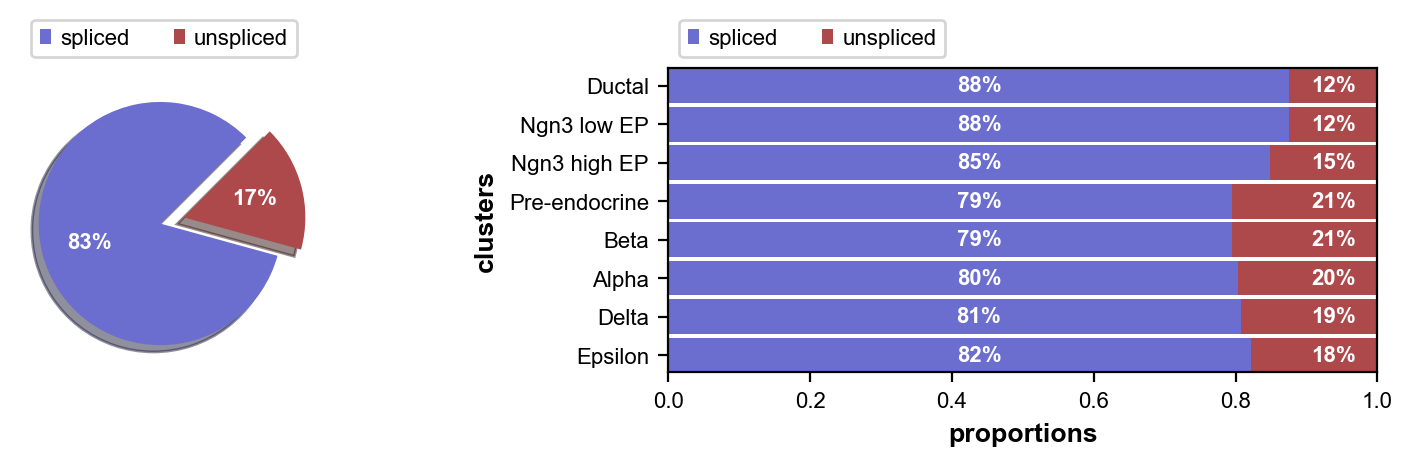

In [7]:
scv.pl.proportions(adata)

In [11]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


In [12]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 55 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:00:54) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [14]:
adata

AnnData object with n_obs × n_vars = 3696 × 1945
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [15]:
adata.var

highly_variable_genes  gene_count_corr     means  dispersions  \
index                                                                   
Sntg1                    True              NaN  0.005065     0.131135   
Snhg6                   False              NaN  0.375835     0.158585   
Ncoa2                   False              NaN  0.106945     0.145879   
Sbspon                   True              NaN  0.143032     0.277016   
Ube2w                   False              NaN  0.018522     0.109459   
...                       ...              ...       ...          ...   
Tmem27                   True              NaN  1.297619     2.475960   
Uty                     False              NaN  0.018673     0.182256   
Ddx3y                    True              NaN  0.165256     0.350978   
Eif2s3y                  True              NaN  0.182643     0.318686   
Erdr1                    True              NaN  0.344720     0.215833   

         dispersions_norm  highly_variable  
index                                       
Sntg1            0.214469             True  
Snhg6            0.040765             True  
Ncoa2            0.298358             True  
Sbspon           1.044508             True  
Ube2w            0.091136             True  
...                   ...              ...  
Tmem27           3.254982             True  
Uty              0.505338             True  
Ddx3y            1.465338             True  
Eif2s3y          1.281603             True  
Erdr1            0.288351             True  

[1945 rows x 6 columns]

In [16]:
adata.obs

clusters_coarse       clusters   S_score  G2M_score  \
index                                                                  
AAACCTGAGAGGGATA   Pre-endocrine  Pre-endocrine -0.224902  -0.252071   
AAACCTGAGCCTTGAT          Ductal         Ductal -0.014707  -0.232610   
AAACCTGAGGCAATTA       Endocrine          Alpha -0.171255  -0.286834   
AAACCTGCATCATCCC          Ductal         Ductal  0.599244   0.191243   
AAACCTGGTAAGTGGC    Ngn3 high EP   Ngn3 high EP -0.179981  -0.126030   
...                          ...            ...       ...        ...   
TTTGTCAAGTGACATA   Pre-endocrine  Pre-endocrine -0.235896  -0.266101   
TTTGTCAAGTGTGGCA    Ngn3 high EP   Ngn3 high EP  0.279374  -0.204047   
TTTGTCAGTTGTTTGG          Ductal         Ductal -0.045692  -0.208907   
TTTGTCATCGAATGCT       Endocrine          Alpha -0.240576  -0.206865   
TTTGTCATCTGTTTGT       Endocrine        Epsilon -0.136407  -0.184763   

                  initial_size_unspliced  initial_size_spliced  initial_size  \
index                                                                          
AAACCTGAGAGGGATA                  1575.0                4954.0        4954.0   
AAACCTGAGCCTTGAT                   978.0                7071.0        7071.0   
AAACCTGAGGCAATTA                  1095.0                4070.0        4070.0   
AAACCTGCATCATCCC                  1655.0                8362.0        8362.0   
AAACCTGGTAAGTGGC                  1014.0                5026.0        5026.0   
...                                  ...                   ...           ...   
TTTGTCAAGTGACATA                  2488.0                9219.0        9219.0   
TTTGTCAAGTGTGGCA                   943.0                7298.0        7298.0   
TTTGTCAGTTGTTTGG                   789.0                5234.0        5234.0   
TTTGTCATCGAATGCT                  1851.0               10260.0       10260.0   
TTTGTCATCTGTTTGT                  1439.0                5922.0        5922.0   

                    n_counts  
index                         
AAACCTGAGAGGGATA  573.248657  
AAACCTGAGCCTTGAT  458.655304  
AAACCTGAGGCAATTA  560.752258  
AAACCTGCATCATCCC  440.770050  
AAACCTGGTAAGTGGC  543.689148  
...                      ...  
TTTGTCAAGTGACATA  638.723389  
TTTGTCAAGTGTGGCA  476.547302  
TTTGTCAGTTGTTTGG  440.744385  
TTTGTCATCGAATGCT  494.840698  
TTTGTCATCTGTTTGT  600.306396  

[3696 rows x 8 columns]

In [10]:
Spliced = adata.to_df(layer='Ms')
Unspliced = adata.to_df(layer='Mu')

In [11]:
import numpy as np

In [15]:
g = sum(Spliced, axis=0)/sum(Unspliced, axis=0)

In [18]:
g

index
Sntg1       0.013473
Snhg6      10.453347
Ncoa2       0.175066
Sbspon      3.962270
Ube2w       0.083865
             ...    
Tmem27     68.815559
Uty         0.096986
Ddx3y       0.778048
Eif2s3y     1.740275
Erdr1       0.912481
Length: 1945, dtype: float32

In [7]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [8]:
adata.var['velocity_gamma']

index
Sntg1      24.762068
Snhg6       0.153177
Ncoa2       3.020332
Sbspon      0.215632
Ube2w       3.243393
             ...    
Tmem27      0.009217
Uty         4.634991
Ddx3y       0.723885
Eif2s3y     0.346667
Erdr1       1.347464
Name: velocity_gamma, Length: 1945, dtype: float32

In [12]:
import pandas as pd

In [14]:
pd.DataFrame(adata.layers['velocity'])

0         1         2         3         4         5         6     \
0     0.045809 -0.013874  0.906566  0.000000  0.117162 -0.000303 -0.198086   
1     0.058600 -0.106498  0.302645 -0.081008  0.180628  0.008252  0.110017   
2     0.058696  0.003613 -0.009070  0.000000  0.347233  0.000000 -0.054470   
3     0.198549 -0.036056  0.434713  0.038094  0.172086 -0.031458  0.109848   
4     0.000000 -0.009642  0.858415 -0.007877  0.134578 -0.004548  0.421422   
...        ...       ...       ...       ...       ...       ...       ...   
3691  0.079814 -0.022929 -0.281304  0.023124  0.297232 -0.001885 -0.099180   
3692  0.192745 -0.082086  0.192292 -0.003563 -0.047761 -0.015640  0.750780   
3693  0.029476 -0.110303  0.419629  0.064663  0.027133 -0.009191  0.368509   
3694  0.165575 -0.031810  0.262943  0.000000  0.122204  0.013240  0.246075   
3695  0.065033 -0.050073  0.406630  0.024182  0.212083 -0.000433  0.060237   

          7         8         9     ...      1935      1936      1937  \
0     0.410751 -0.094412  0.018837  ...  0.145335  0.060290 -0.028292   
1     0.000000  0.088898 -0.033615  ...  0.061064  0.000000  0.000000   
2    -0.663097  0.171124  0.145360  ...  0.138409  0.046809  0.101314   
3     0.000000  0.163963  0.027747  ...  0.060526  0.044224  0.000000   
4     6.523755  0.106955  0.045715  ...  0.343615 -0.070510  0.000000   
...        ...       ...       ...  ...       ...       ...       ...   
3691 -1.732272 -0.053912  0.042693  ...  0.260732 -0.011992  0.009625   
3692  3.897942  0.071718  0.330378  ...  0.279091  0.571227 -0.005249   
3693  0.000000 -0.003852 -0.189546  ... -0.107653  0.000000  0.000000   
3694  0.677578 -0.179644 -0.002723  ...  0.197631  0.016508  0.032059   
3695  0.133927  0.072134 -0.149489  ...  0.065875  0.088332 -0.020815   

          1938      1939      1940      1941      1942      1943      1944  
0    -0.038317 -0.069495  0.004702  0.356629  0.080727  0.102456 -0.183950  
1    -0.083959  0.000000  0.013099  0.413533  0.054413  0.047919  0.114977  
2    -0.113471  0.050075  0.059981  0.033049  0.102039  0.026801 -0.128654  
3    -0.009959  0.000000 -0.000159  0.050653  0.207714  0.048796 -0.136330  
4    -0.068881  0.000000  0.000000 -0.123818  0.312635  0.025256 -0.478304  
...        ...       ...       ...       ...       ...       ...       ...  
3691 -0.015344 -0.026185  0.022169  0.195483  0.040074  0.072391 -0.219626  
3692 -0.040648  0.046746 -0.000235 -0.113618  0.001998 -0.018233 -0.072610  
3693  0.147062  0.000000 -0.000218  0.069278 -0.000702  0.036405  0.079089  
3694 -0.140831  0.201702  0.101726 -0.067754 -0.164266  0.102093 -0.284267  
3695 -0.145988 -0.079618  0.009765  0.021456  0.113567 -0.022385 -0.179427  

[3696 rows x 1945 columns]

In [10]:
Spliced = adata.to_df(layer='Ms')
Unspliced = adata.to_df(layer='Mu')

In [11]:
Unspliced - adata.var['velocity_gamma']*Spliced

index                Sntg1     Snhg6     Ncoa2    Sbspon     Ube2w      Mcm3  \
index                                                                          
AAACCTGAGAGGGATA  0.045809 -0.013874  0.906566  0.000000  0.117162 -0.000303   
AAACCTGAGCCTTGAT  0.058600 -0.106498  0.302645 -0.081008  0.180628  0.008252   
AAACCTGAGGCAATTA  0.058696  0.003613 -0.009070  0.000000  0.347233  0.000000   
AAACCTGCATCATCCC  0.198549 -0.036056  0.434713  0.038094  0.172086 -0.031458   
AAACCTGGTAAGTGGC  0.000000 -0.009642  0.858415 -0.007877  0.134578 -0.004548   
...                    ...       ...       ...       ...       ...       ...   
TTTGTCAAGTGACATA  0.079814 -0.022929 -0.281304  0.023124  0.297232 -0.001885   
TTTGTCAAGTGTGGCA  0.192745 -0.082086  0.192292 -0.003563 -0.047761 -0.015640   
TTTGTCAGTTGTTTGG  0.029476 -0.110303  0.419629  0.064663  0.027133 -0.009191   
TTTGTCATCGAATGCT  0.165575 -0.031810  0.262943  0.000000  0.122204  0.013240   
TTTGTCATCTGTTTGT  0.065033 -0.050073  0.406630  0.024182  0.212083 -0.000433   

index              Fam135a    Adgrb3   Tmem131    Tbc1d8  ...   Sh3kbp1  \
index                                                     ...             
AAACCTGAGAGGGATA -0.198086  0.410751 -0.094412  0.018837  ...  0.145335   
AAACCTGAGCCTTGAT  0.110017  0.000000  0.088898 -0.033615  ...  0.061064   
AAACCTGAGGCAATTA -0.054470 -0.663097  0.171124  0.145360  ...  0.138409   
AAACCTGCATCATCCC  0.109848  0.000000  0.163963  0.027747  ...  0.060526   
AAACCTGGTAAGTGGC  0.421422  6.523755  0.106955  0.045715  ...  0.343615   
...                    ...       ...       ...       ...  ...       ...   
TTTGTCAAGTGACATA -0.099180 -1.732272 -0.053912  0.042693  ...  0.260732   
TTTGTCAAGTGTGGCA  0.750780  3.897942  0.071718  0.330378  ...  0.279091   
TTTGTCAGTTGTTTGG  0.368509  0.000000 -0.003852 -0.189546  ... -0.107653   
TTTGTCATCGAATGCT  0.246075  0.677578 -0.179644 -0.002723  ...  0.197631   
TTTGTCATCTGTTTGT  0.060237  0.133927  0.072134 -0.149489  ...  0.065875   

index              Map3k15      Rai2     Rbbp7     Ap1s2    Tmem27       Uty  \
index                                                                          
AAACCTGAGAGGGATA  0.060290 -0.028292 -0.038317 -0.069495  0.004702  0.356629   
AAACCTGAGCCTTGAT  0.000000  0.000000 -0.083959  0.000000  0.013099  0.413533   
AAACCTGAGGCAATTA  0.046809  0.101314 -0.113471  0.050075  0.059981  0.033049   
AAACCTGCATCATCCC  0.044224  0.000000 -0.009959  0.000000 -0.000159  0.050653   
AAACCTGGTAAGTGGC -0.070510  0.000000 -0.068881  0.000000  0.000000 -0.123818   
...                    ...       ...       ...       ...       ...       ...   
TTTGTCAAGTGACATA -0.011992  0.009625 -0.015344 -0.026185  0.022169  0.195483   
TTTGTCAAGTGTGGCA  0.571227 -0.005249 -0.040648  0.046746 -0.000235 -0.113618   
TTTGTCAGTTGTTTGG  0.000000  0.000000  0.147062  0.000000 -0.000218  0.069278   
TTTGTCATCGAATGCT  0.016508  0.032059 -0.140831  0.201702  0.101726 -0.067754   
TTTGTCATCTGTTTGT  0.088332 -0.020815 -0.145988 -0.079618  0.009765  0.021456   

index                Ddx3y   Eif2s3y     Erdr1  
index                                           
AAACCTGAGAGGGATA  0.080727  0.102456 -0.183950  
AAACCTGAGCCTTGAT  0.054413  0.047919  0.114977  
AAACCTGAGGCAATTA  0.102039  0.026801 -0.128654  
AAACCTGCATCATCCC  0.207714  0.048796 -0.136330  
AAACCTGGTAAGTGGC  0.312635  0.025256 -0.478304  
...                    ...       ...       ...  
TTTGTCAAGTGACATA  0.040074  0.072391 -0.219626  
TTTGTCAAGTGTGGCA  0.001998 -0.018233 -0.072610  
TTTGTCAGTTGTTTGG -0.000702  0.036405  0.079089  
TTTGTCATCGAATGCT -0.164266  0.102093 -0.284267  
TTTGTCATCTGTTTGT  0.113567 -0.022385 -0.179427  

[3696 rows x 1945 columns]

In [15]:
from explinear import ExpLinearRegression

In [16]:
llr = ExpLinearRegression()

In [17]:
llr.fit(Spliced, Unspliced)

In [18]:
import numpy as np

In [19]:
gamma = g
gamma

index
Sntg1       0.013473
Snhg6      10.453347
Ncoa2       0.175066
Sbspon      3.962270
Ube2w       0.083865
             ...    
Tmem27     68.815559
Uty         0.096986
Ddx3y       0.778048
Eif2s3y     1.740275
Erdr1       0.912481
Length: 1945, dtype: float32

In [20]:
velo = Unspliced - gamma*Spliced
velo

index                Sntg1     Snhg6     Ncoa2    Sbspon     Ube2w  \
index                                                                
AAACCTGAGAGGGATA  0.045809 -3.211034  1.118267  0.000000  0.286983   
AAACCTGAGCCTTGAT  0.058600 -9.802679  0.533341 -2.384614  0.180628   
AAACCTGAGGCAATTA  0.058696 -1.663640  0.471759  0.000000  0.347233   
AAACCTGCATCATCCC  0.198549 -8.257622  0.605480 -1.362715  0.172086   
AAACCTGGTAAGTGGC  0.000000 -4.675069  0.968093 -0.144743  0.134578   
...                    ...       ...       ...       ...       ...   
TTTGTCAAGTGACATA  0.079814 -4.288353  0.662620  0.023124  0.297232   
TTTGTCAAGTGTGGCA  0.192745 -7.234476  0.342788 -0.065469  0.149090   
TTTGTCAGTTGTTTGG  0.029476 -7.527507  0.693160 -1.384733  0.110581   
TTTGTCATCGAATGCT  0.165575 -2.170853  0.847782  0.000000  0.275082   
TTTGTCATCTGTTTGT  0.065033 -3.417189  0.650508 -0.040874  0.273787   

index                   Mcm3   Fam135a    Adgrb3   Tmem131    Tbc1d8  ...  \
index                                                                 ...   
AAACCTGAGAGGGATA   -1.370715  0.393039  0.880115  0.118451  0.138996  ...   
AAACCTGAGCCTTGAT  -61.394840  0.331281  0.000000  0.180323  0.053959  ...   
AAACCTGAGGCAATTA    0.000000  0.301578  0.680008  0.269835  0.145360  ...   
AAACCTGCATCATCCC -142.081345  0.255697  0.000000  0.189259  0.027747  ...   
AAACCTGGTAAGTGGC  -20.540606  0.994054  7.544723  0.166808  0.385062  ...   
...                      ...       ...       ...       ...       ...  ...   
TTTGTCAAGTGACATA   -8.512684  0.574788  1.860376  0.077651  0.149938  ...   
TTTGTCAAGTGTGGCA  -70.638641  1.204762  4.695126  0.181188  0.661413  ...   
TTTGTCAGTTGTTTGG  -41.513130  0.464239  0.000000  0.084080  0.006757  ...   
TTTGTCATCGAATGCT  -11.808582  0.547957  0.677578  0.016401  0.101944  ...   
TTTGTCATCTGTTTGT   -1.955986  0.301618  0.133927  0.171716  0.044027  ...   

index              Sh3kbp1   Map3k15      Rai2      Rbbp7     Ap1s2  \
index                                                                 
AAACCTGAGAGGGATA  0.195490  0.008672 -2.672086 -19.727030 -0.189877   
AAACCTGAGCCTTGAT  0.067130  0.000000  0.000000 -49.932697  0.000000   
AAACCTGAGGCAATTA  0.198598  0.014771 -1.733632 -29.834179 -0.047274   
AAACCTGCATCATCCC  0.088268  0.044224  0.000000 -64.848366  0.000000   
AAACCTGGTAAGTGGC  0.421282 -0.417574  0.000000 -15.256439  0.000000   
...                    ...       ...       ...        ...       ...   
TTTGTCAAGTGACATA  0.349260 -0.125692 -0.577401 -17.164274 -0.091473   
TTTGTCAAGTGTGGCA  0.316535  0.403930 -0.096350 -23.136370  0.040343   
TTTGTCAGTTGTTTGG -0.056544  0.000000  0.000000 -49.183418  0.000000   
TTTGTCATCGAATGCT  0.241538 -0.154672 -2.911345 -39.291855  0.114382   
TTTGTCATCTGTTTGT  0.094753  0.051159 -2.091656 -44.955566 -0.302584   

index                 Tmem27       Uty     Ddx3y   Eif2s3y     Erdr1  
index                                                                 
AAACCTGAGAGGGATA  -91.983009  0.356629  0.062072 -0.460768 -0.054293  
AAACCTGAGCCTTGAT   -4.354989  0.503200  0.038635 -0.452938  0.234593  
AAACCTGAGGCAATTA -677.410645  0.033049  0.096010 -0.074033  0.013204  
AAACCTGCATCATCCC   -1.188159  0.050653  0.203563 -0.134374  0.212912  
AAACCTGGTAAGTGGC    0.000000  0.044625  0.305324 -0.359899 -0.294938  
...                      ...       ...       ...       ...       ...  
TTTGTCAAGTGACATA  -39.468906  0.195483  0.019029 -0.106259  0.000133  
TTTGTCAAGTGTGGCA   -1.752617 -0.002377 -0.009963 -0.187571  0.158693  
TTTGTCAGTTGTTTGG   -1.628376  0.069278 -0.003336 -0.052099  0.255724  
TTTGTCATCGAATGCT -694.261169  0.227361 -0.187418 -0.283485 -0.060310  
TTTGTCATCTGTTTGT -518.644836  0.125892  0.107356 -0.293467 -0.023024  

[3696 rows x 1945 columns]

In [21]:
adata

AnnData object with n_obs × n_vars = 3696 × 1945
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [22]:
adata.layers['velocity'] = velo

In [23]:
adata

AnnData object with n_obs × n_vars = 3696 × 1945
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity'
    obsp: 'distances', 'connectivities'

In [24]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:50) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


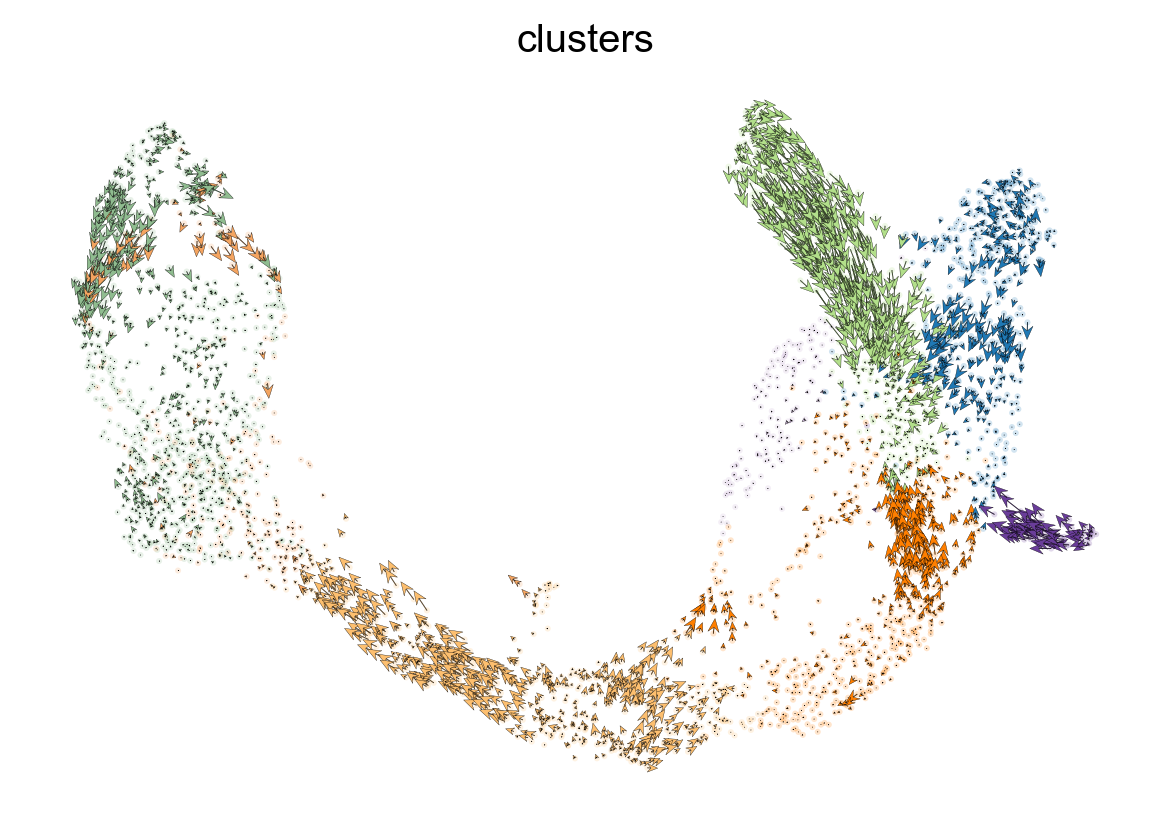

In [25]:
scv.pl.velocity_embedding(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

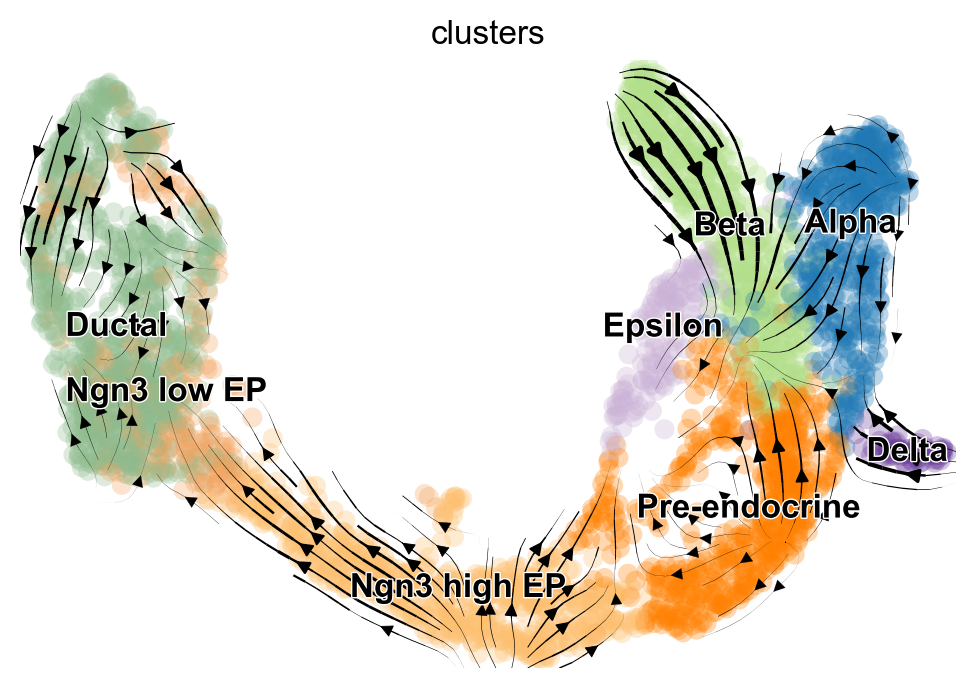

In [26]:
scv.pl.velocity_embedding_stream(adata, basis='umap')

In [25]:
adata

AnnData object with n_obs × n_vars = 3696 × 1945
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


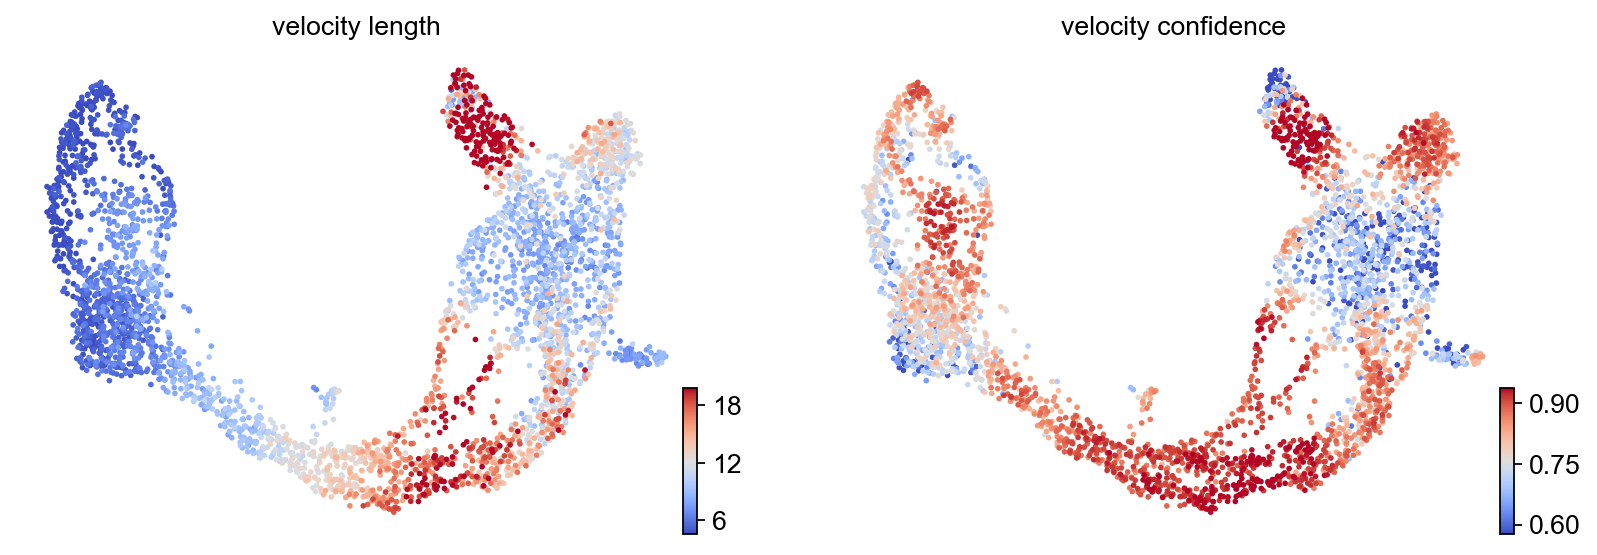

In [12]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

In [29]:
g2 = sum((Spliced+1)/(Unspliced+1), axis=0)/1945

In [30]:
gamma = g2
gamma

index
Sntg1      1.577517
Snhg6      2.647063
Ncoa2      1.301127
Sbspon     2.101814
Ube2w      1.585411
             ...   
Tmem27     6.381334
Uty        1.656512
Ddx3y      1.831178
Eif2s3y    2.042043
Erdr1      1.881956
Length: 1945, dtype: float32

In [31]:
velo = Unspliced - gamma*Spliced
velo

index                Sntg1     Snhg6     Ncoa2    Sbspon     Ube2w      Mcm3  \
index                                                                          
AAACCTGAGAGGGATA  0.045809 -0.787973  1.034483  0.000000  0.206277 -0.041008   
AAACCTGAGCCTTGAT  0.058600 -2.454146  0.442039 -1.240720  0.180628 -1.815575   
AAACCTGAGGCAATTA  0.058696 -0.400063  0.281463  0.000000  0.347233  0.000000   
AAACCTGCATCATCCC  0.198549 -2.026668  0.537896 -0.667120  0.172086 -4.250699   
AAACCTGGTAAGTGGC  0.000000 -1.139239  0.924686 -0.076780  0.134578 -0.614521   
...                    ...       ...       ...       ...       ...       ...   
TTTGTCAAGTGACATA  0.079814 -1.055677  0.289047  0.023124  0.297232 -0.254677   
TTTGTCAAGTGTGGCA  0.192745 -1.813828  0.283226 -0.034729  0.055538 -2.113322   
TTTGTCAGTTGTTTGG  0.029476 -1.906163  0.584906 -0.665011  0.070923 -1.241963   
TTTGTCATCGAATGCT  0.165575 -0.549717  0.616322  0.000000  0.202428 -0.337898   
TTTGTCATCTGTTTGT  0.065033 -0.865322  0.553989 -0.008570  0.244462 -0.058518   

index              Fam135a    Adgrb3   Tmem131    Tbc1d8  ...   Sh3kbp1  \
index                                                     ...             
AAACCTGAGAGGGATA -0.042206  0.862671 -0.336524  0.052046  ...  0.074194   
AAACCTGAGCCTTGAT  0.168365  0.000000 -0.015089 -0.009412  ...  0.052460   
AAACCTGAGGCAATTA  0.039420  0.630090  0.058849  0.145360  ...  0.053035   
AAACCTGCATCATCCC  0.148309  0.000000  0.135191  0.027747  ...  0.021177   
AAACCTGGTAAGTGGC  0.572425  7.506777  0.038878  0.139502  ...  0.233451   
...                    ...       ...       ...       ...  ...       ...   
TTTGTCAAGTGACATA  0.078546  1.726852 -0.203554  0.072333  ...  0.135162   
TTTGTCAAGTGTGGCA  0.870495  4.665498 -0.052795  0.421867  ...  0.225979   
TTTGTCAGTTGTTTGG  0.393753  0.000000 -0.103868 -0.135293  ... -0.180147   
TTTGTCATCGAATGCT  0.325682  0.677578 -0.402627  0.026204  ...  0.135354   
TTTGTCATCTGTTTGT  0.123889  0.133927 -0.041132 -0.096006  ...  0.024912   

index              Map3k15      Rai2      Rbbp7     Ap1s2     Tmem27  \
index                                                                  
AAACCTGAGAGGGATA -0.104215 -1.455011  -4.703225 -0.494712  -8.514229   
AAACCTGAGCCTTGAT  0.000000  0.000000 -11.894773  0.000000  -0.391427   
AAACCTGAGGCAATTA -0.055295 -0.888912  -7.155289 -0.293784 -62.680199   
AAACCTGCATCATCCC  0.044224  0.000000 -15.372322  0.000000  -0.110179   
AAACCTGGTAAGTGGC -1.176596  0.000000  -3.667315  0.000000   0.000000   
...                    ...       ...        ...       ...        ...   
TTTGTCAAGTGACATA -0.374351 -0.307163  -4.078492 -0.256795  -3.635078   
TTTGTCAAGTGTGGCA  0.038055 -0.054411  -5.512788  0.024129  -0.162522   
TTTGTCAGTTGTTTGG  0.000000  0.000000 -11.540959  0.000000  -0.151001   
TTTGTCATCGAATGCT -0.529037 -1.556344  -9.417003 -0.106731 -64.202835   
TTTGTCATCTGTTTGT -0.030136 -1.138341 -10.762858 -0.867183 -48.022549   

index                  Uty     Ddx3y   Eif2s3y     Erdr1  
index                                                     
AAACCTGAGAGGGATA  0.356629 -0.300670 -0.582727 -0.343268  
AAACCTGAGCCTTGAT  0.472385 -0.268141 -0.561392 -0.032003  
AAACCTGAGGCAATTA  0.033049 -0.021222 -0.095868 -0.302964  
AAACCTGCATCATCCC  0.050653  0.122855 -0.174037 -0.565466  
AAACCTGGTAAGTGGC -0.013262  0.163175 -0.443300 -0.703616  
...                    ...       ...       ...       ...  
TTTGTCAAGTGACATA  0.195483 -0.390160 -0.144943 -0.489659  
TTTGTCAAGTGTGGCA -0.040606 -0.242531 -0.224239 -0.356826  
TTTGTCAGTTGTTTGG  0.069278 -0.054558 -0.071263 -0.137954  
TTTGTCATCGAATGCT  0.125942 -0.637582 -0.366977 -0.559458  
TTTGTCATCTGTTTGT  0.090002 -0.013401 -0.352166 -0.371609  

[3696 rows x 1945 columns]

In [32]:
adata.layers['velocity'] = velo

In [33]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:50) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


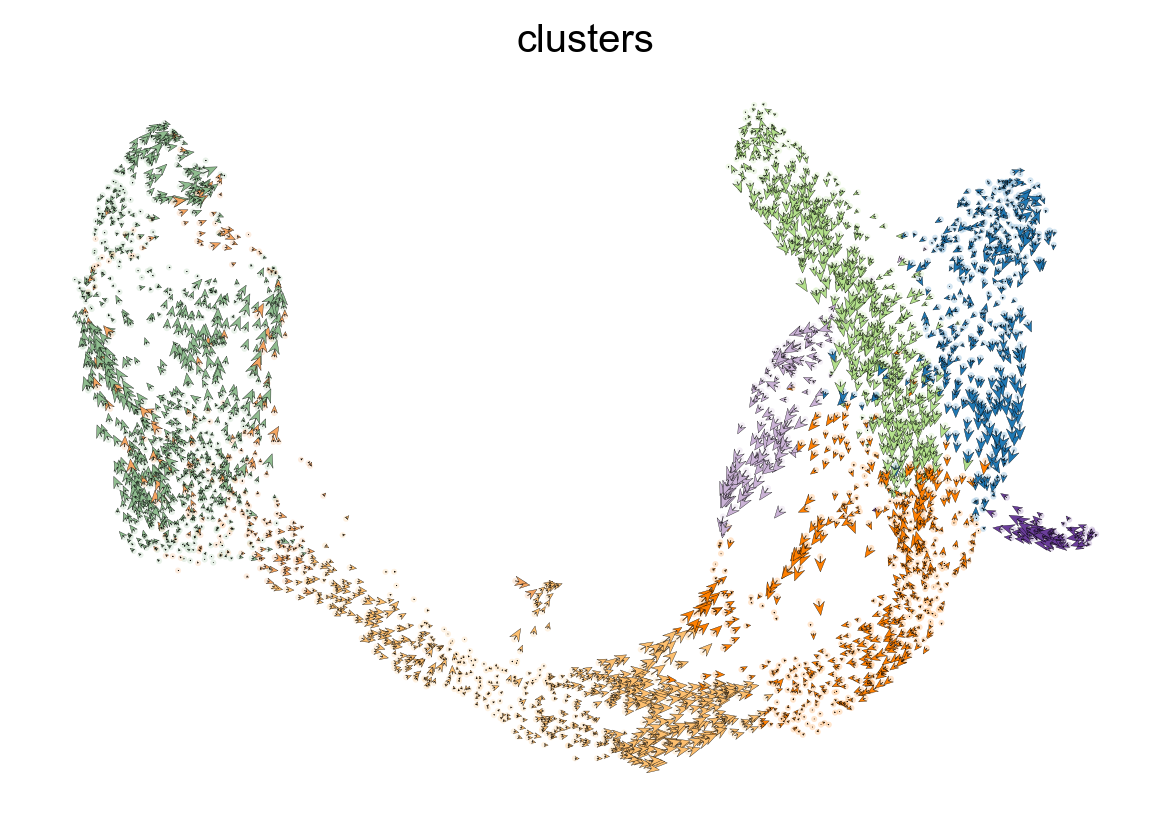

In [34]:
scv.pl.velocity_embedding(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

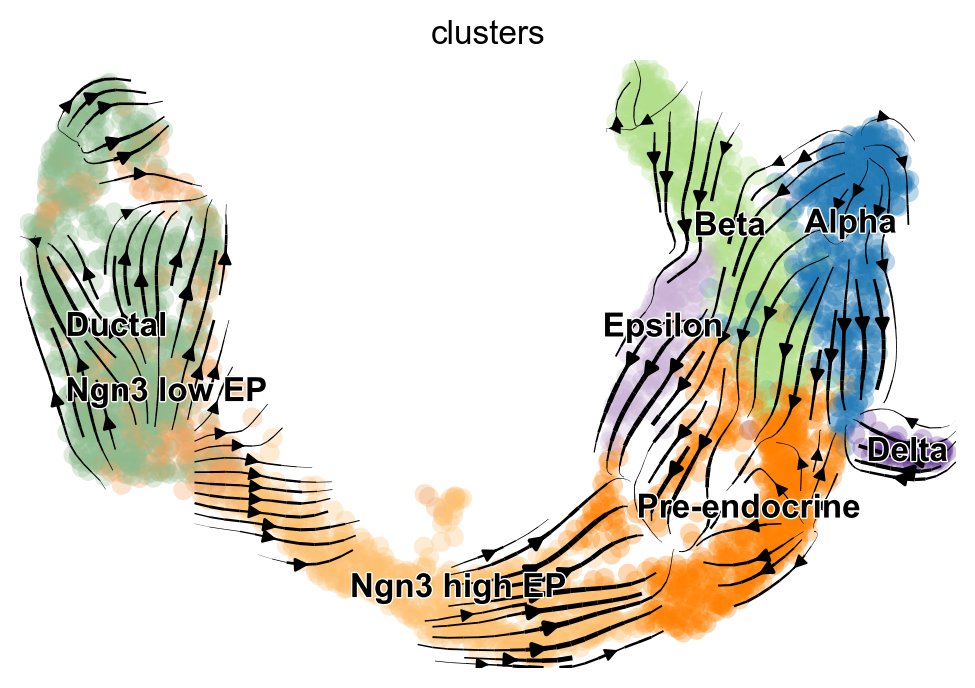

In [35]:
scv.pl.velocity_embedding_stream(adata, basis='umap')

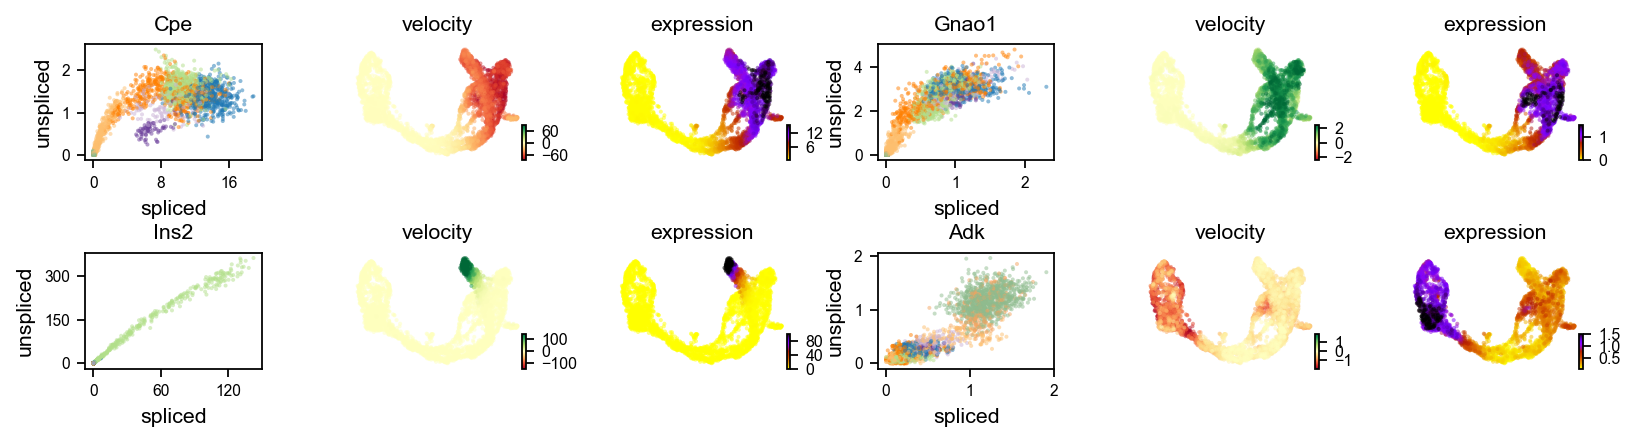

In [36]:
scv.pl.velocity(adata, ['Cpe',  'Gnao1', 'Ins2', 'Adk'], ncols=2)

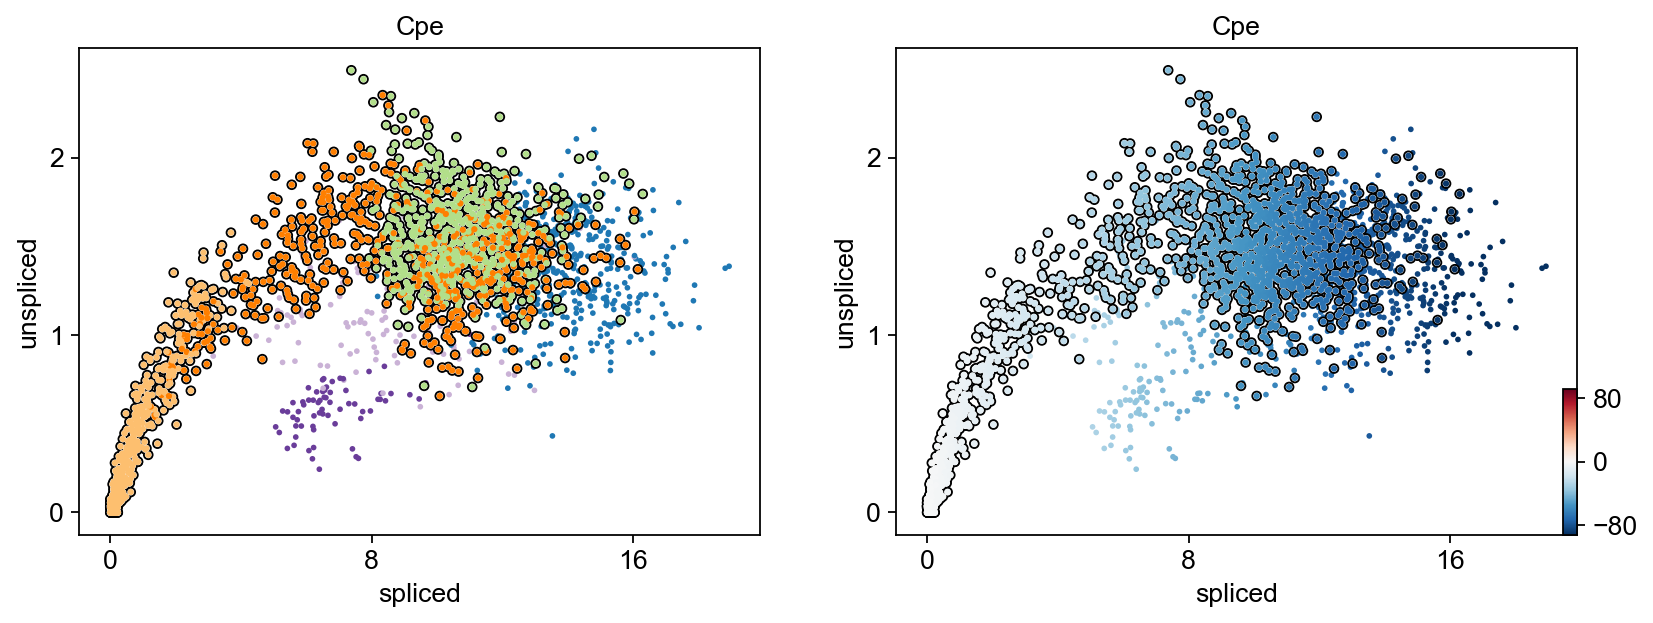

In [37]:
scv.pl.scatter(adata, 'Cpe', color=['clusters', 'velocity'],
               add_outline='Ngn3 high EP, Pre-endocrine, Beta')

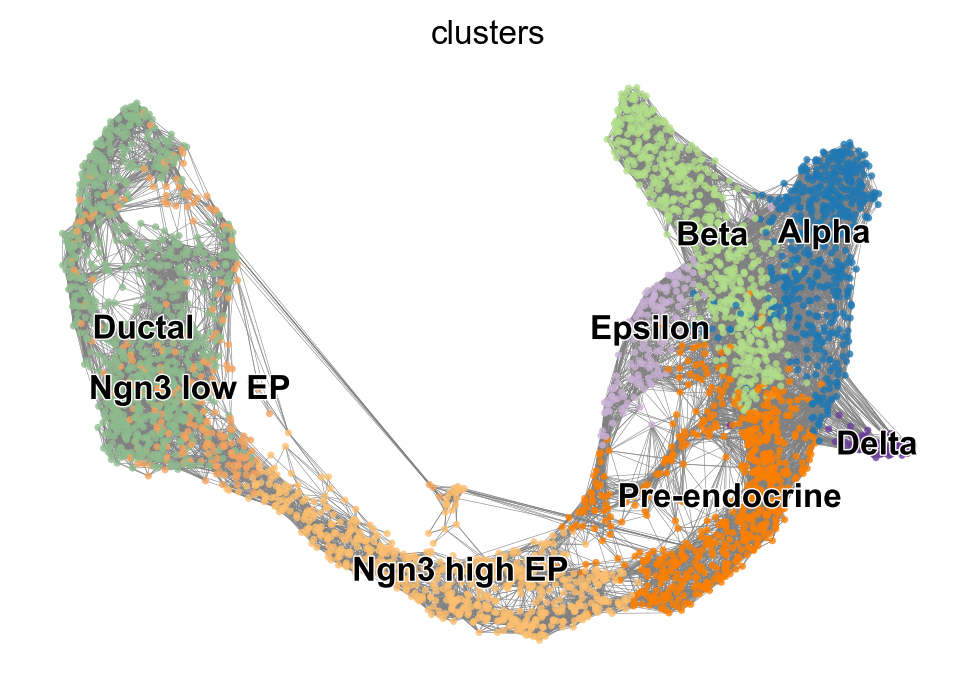

In [38]:
scv.pl.velocity_graph(adata, threshold=.1)

In [39]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

scv.tl.paga(adata, groups='clusters')
df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')

computing terminal states
    identified 3 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:03) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


C:\Users\Pradip\AppData\Roaming\Python\Python310\site-packages\networkx\convert.py:158: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  return nx.from_scipy_sparse_matrix(data, create_using=create_using)


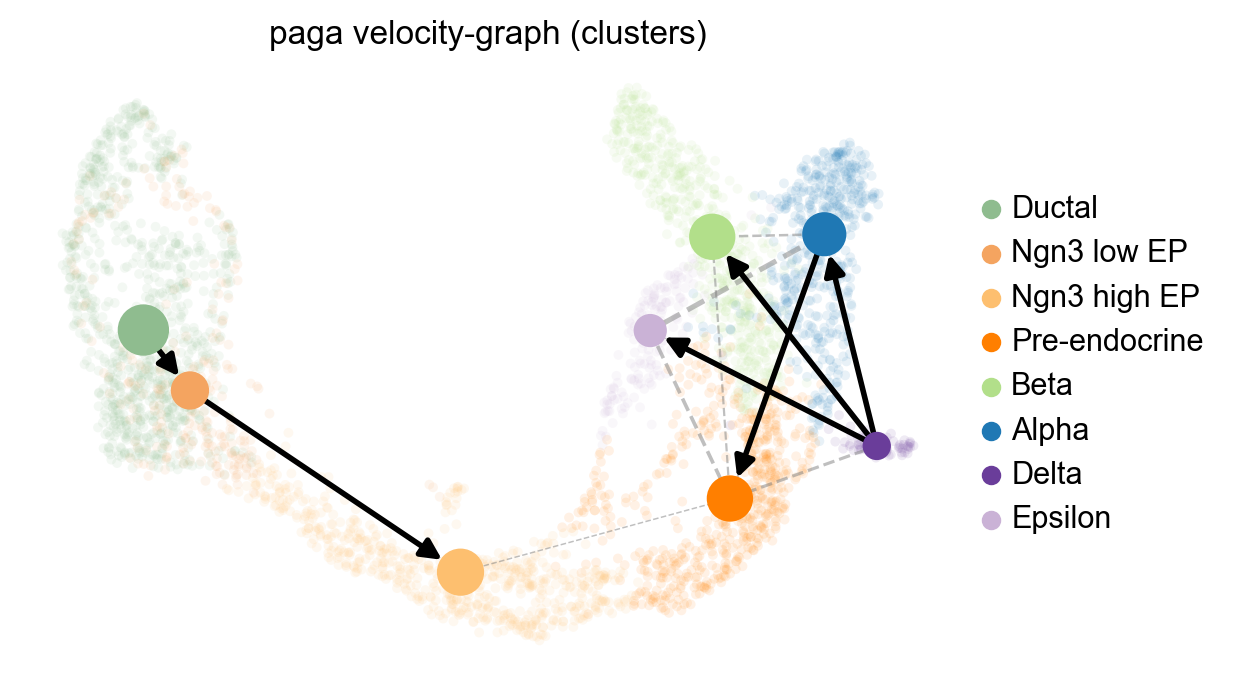

In [40]:
scv.pl.paga(adata, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)